### Afficher un échantillon d’images pour chaque classe avec les boîtes englobantes.

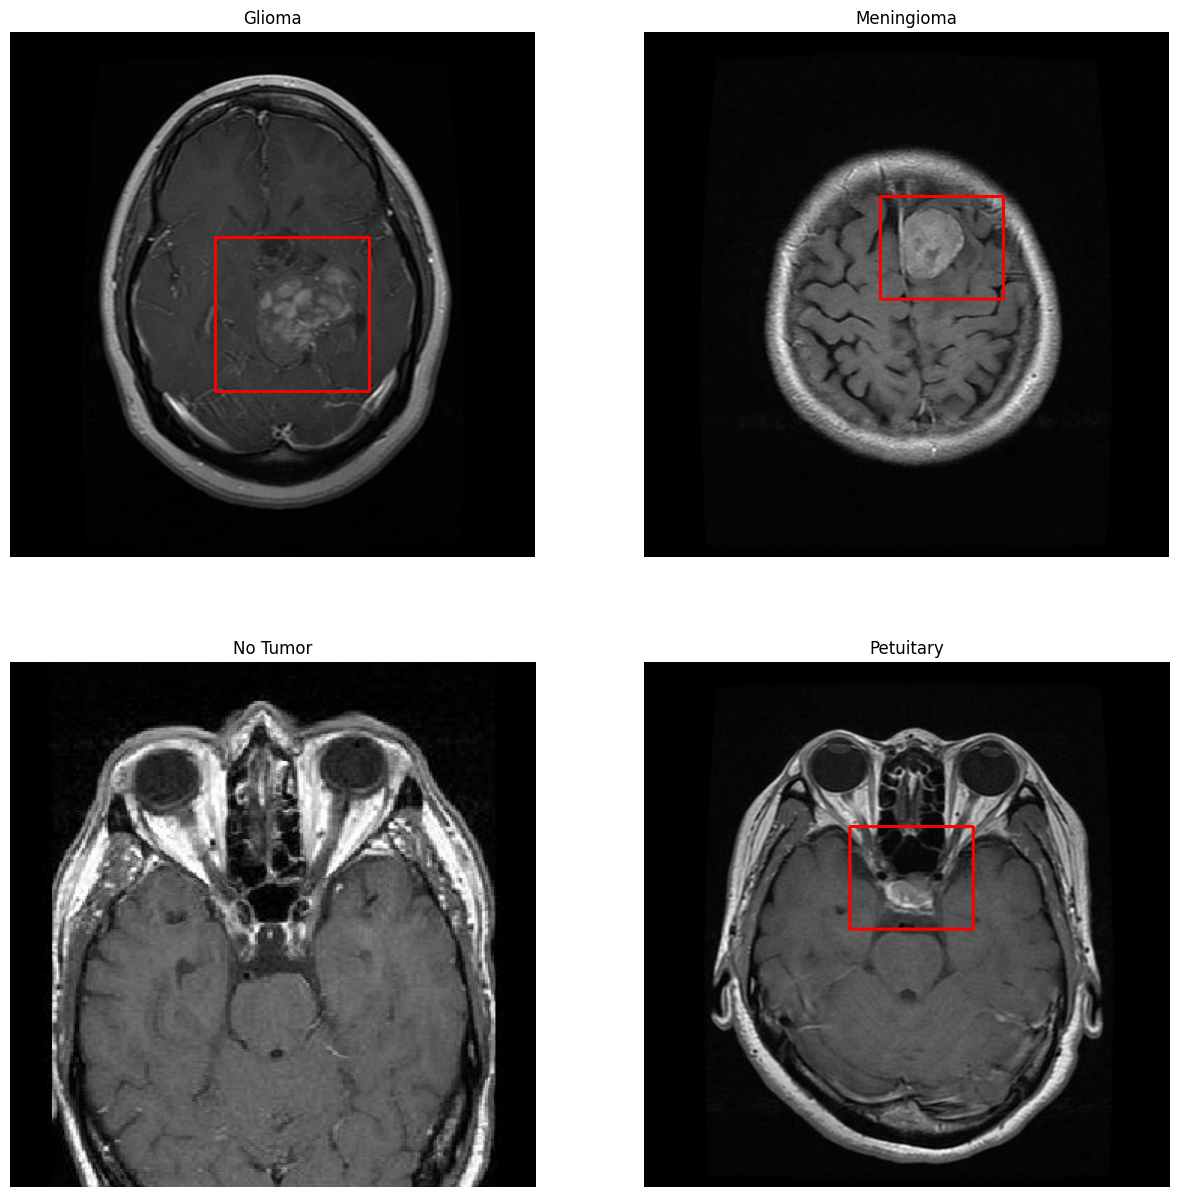

In [62]:
image1_path = '../data/raw/Data_Brain/Train/Glioma/images/gg (1).jpg'
image2_path = '../data/raw/Data_Brain/Train/Meningioma/images/m (2).jpg'
image3_path = '../data/raw/Data_Brain/Train/No Tumor/images/1.jpg'
image4_path = '../data/raw/Data_Brain/Train/Pituitary/images/p (1).jpg'

import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

# Glioma

image = cv2.imread(image1_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x_min, y_min, x_max, y_max = 200, 200, 350, 350
cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Glioma")
plt.axis('off')

# Meningioma

image = cv2.imread(image2_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x_min, y_min, x_max, y_max = 230, 160, 350, 260
cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

plt.subplot(2, 2, 2)
plt.imshow(image_rgb)
plt.title("Meningioma")
plt.axis('off')

# No Tumor

image = cv2.imread(image3_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.subplot(2, 2, 3)
plt.imshow(image_rgb)
plt.title("No Tumor")
plt.axis('off')

# Petuitary

image = cv2.imread(image4_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x_min, y_min, x_max, y_max = 200, 160, 320, 260
cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

plt.subplot(2, 2, 4)
plt.imshow(image_rgb)
plt.title("Petuitary")
plt.axis('off')



plt.show()



### Créer un dossier pour stocker les données après filtrage.

In [49]:
import os

dir_path = "../data/processed/Data_Brain"

try:
    os.mkdir(dir_path)
except:
    print("Directory already exists")

Directory already exists


### Pour chaque image : Vérifier si un fichier .txt correspondant existe.

- Si oui : copier l’image et le label vers les dossiers outputpath/images/ et outputpath/labels/ (train, valid, test).

- Si non : afficher un message d’avertissement et ignorer l’image.

In [59]:
import shutil

raw_data_path = "../data/raw/Data_Brain"
processed_data_path = '../data/processed/Data_Brain'

data_folders = os.listdir(raw_data_path)

# For each folder Train + Val
for folder in data_folders:
    data_folder_path = os.path.join(raw_data_path, folder)
    data_processed_folder_path = os.path.join(processed_data_path, folder)

    os.makedirs(os.path.join(data_processed_folder_path, 'images'))
    os.makedirs(os.path.join(data_processed_folder_path, 'labels'))

    categories = data_folders = os.listdir(data_folder_path)

    # For each class among the 4 classes
    for category in categories:
        category_folder_path = os.path.join(data_folder_path, category)
        
        try:
            images_folder = os.path.join(category_folder_path, 'images')
            labels_folder = os.path.join(category_folder_path, 'labels')
        except:
            pass

        # For each image
        for image in os.listdir(images_folder):

            image_name = os.path.splitext(image)[0]

            if os.path.exists(f"{labels_folder}/{image_name}.txt"):

                # Copy image
                image_source = os.path.join(images_folder, image)
                image_destination = os.path.join(data_processed_folder_path, 'images', image)

                # Copy Label
                label_source = os.path.join(labels_folder, image_name + '.txt')
                label_destination = os.path.join(data_processed_folder_path, 'labels', image_name + '.txt')

                shutil.copy(image_source, image_destination)
                shutil.copy(label_source, label_destination)
            else:
                print("The image", image, "does not have a label")

The image image(55).jpg does not have a label
The image image(61).jpg does not have a label


#### Les classes:

In [61]:
raw_data_path = "../data/raw/Data_Brain"

data_folders = os.listdir(raw_data_path)[0]

data_folder_path = os.path.join(raw_data_path, data_folders)

classes = data_folders = os.listdir(data_folder_path)

print(classes)

['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
